# Analyzing the effect of Number of Candidates on *Blocking Probability*

* In this notebook, we simulate the `blocking probability` as a function of number of PDCCH candidates.
* In NR the number of PDCCH candidates can be configurable for each Aggregation Level (AL) among {1,2,3,4,5,6,8} in the USS.

* We seperately evaluate the impact of number of candidates for AL 1, AL 2, and AL 4 by changing the number of candidates for one of the ALs (from the set above), while setting the number of candidates for other ALs to 1.

* The AL distribution considered for simulation is [0.4, 0.3, 0.2, 0.05, 0.05] for ALs 1,2,4,8,16 respectively.
    
* The CORESET size `Nccep` is 54 CCEs for this simulation.

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# %matplotlib widget
import matplotlib.pyplot  as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

import numpy      as np

In [2]:
import sys
sys.path.append("../../")
from toolkit5G.Scheduler import PDCCHScheduler

## Simulation Parameters
The following parameters are used for this simulation:
- `coresetID` denotes the coreset ID.
- `slotNumber` denotes the slot-number carrying the PDCCH.
- `searchSpaceType` denotes the search space type. UE specific search space (USS) or Common search space (CSS).
- `nci` denotes the variable corresponding to carrier aggregation. Current simulation does not assume carrier aggregation.

In [3]:
mu               = np.random.randint(4)    # numerlogy for sub-carrier spacing
numSlotsPerFrame = 2**mu * 10              # number of slots per radio frame
coresetID        = 1                       # coreset ID
slotNumber       = 0               
searchSpaceType  = "USS"                   # search space type. UE specific search space
nci              = 0                       # variable corresponding to carrier aggregation 
numIterations    = 5000
numUEs           = 20



## PDCCH Scheduling Parameters
Following parameters are crucial for PDCCH scheduling performance:
- ``Nccep`` denotes coreset size or number of CCEs available for scheduling UEs.
- ``strategy`` denotes the scheduling strategy.
- ``numCandidates`` denotes number of PDCCH candidates per each Aggregation Level.

In [4]:
aggLevelProbDistribution = np.array([0.4, 0.3, 0.2, 0.05, 0.05])
Nccep                    = 54
supportedNumCand         = np.array([1,2,3,4,5,6,7,8], dtype = int)
strategy                 = "Conservative" 

pdcchSchedulerObj = PDCCHScheduler(mu, slotNumber, coresetID, nci)


In [5]:
#########
# AL1
#########

probOfBlockingForAL1 = np.zeros((supportedNumCand.size,))
for n in range(supportedNumCand.size):
    print("Simulating number of candidates : "+str(n)+", "+str(supportedNumCand[n]))
    x = supportedNumCand[n]
    numCandidates  = np.array([x,1,1,1,1], dtype=int)
    prob = 0
    for i in range(numIterations): 
        ueALdistribution  = np.random.multinomial(numUEs, aggLevelProbDistribution) 
        rnti              = np.random.choice( np.arange(1,65519+1), size = (numUEs,), replace=False)
        count             = pdcchSchedulerObj(Nccep,searchSpaceType,ueALdistribution,numCandidates,rnti,strategy)[0]
        numBlockedUEs     = np.sum(count)
        prob              = prob + numBlockedUEs/numUEs
    probOfBlockingForAL1[n] = prob/numIterations
    

Simulating number of candidates : 0, 1
Simulating number of candidates : 1, 2
Simulating number of candidates : 2, 3
Simulating number of candidates : 3, 4
Simulating number of candidates : 4, 5
Simulating number of candidates : 5, 6
Simulating number of candidates : 6, 7
Simulating number of candidates : 7, 8


In [6]:
#########
# AL2
#########
probOfBlockingForAL2 = np.zeros((supportedNumCand.size,))
for n in range(supportedNumCand.size):
    print("Simulating number of candidates : "+str(n)+", "+str(supportedNumCand[n]))
    x = supportedNumCand[n]
    numCandidates  = np.array([1,x,1,1,1], dtype=int)
    prob = 0
    for i in range(numIterations): 
        ueALdistribution  = np.random.multinomial(numUEs, aggLevelProbDistribution) 
        rnti              = np.random.choice( np.arange(1,65519+1), size = (numUEs,), replace=False)
        count             = pdcchSchedulerObj(Nccep,searchSpaceType,ueALdistribution,numCandidates,rnti,strategy)[0]
        numBlockedUEs     = np.sum(count)
        prob              = prob + numBlockedUEs/numUEs
    probOfBlockingForAL2[n] = prob/numIterations

Simulating number of candidates : 0, 1
Simulating number of candidates : 1, 2
Simulating number of candidates : 2, 3
Simulating number of candidates : 3, 4
Simulating number of candidates : 4, 5
Simulating number of candidates : 5, 6
Simulating number of candidates : 6, 7
Simulating number of candidates : 7, 8


In [7]:
#########
# AL4
#########
probOfBlockingForAL4 = np.zeros((supportedNumCand.size,))
for n in range(supportedNumCand.size):
    print("Simulating number of candidates : "+str(n)+", "+str(supportedNumCand[n]))
    x = supportedNumCand[n]
    numCandidates  = np.array([1,1,x,1,1], dtype=int)
    prob = 0
    for i in range(numIterations): 
        ueALdistribution  = np.random.multinomial(numUEs, aggLevelProbDistribution) 
        rnti              = np.random.choice( np.arange(1,65519+1), size = (numUEs,), replace=False)
        count             = pdcchSchedulerObj(Nccep,searchSpaceType,ueALdistribution,numCandidates,rnti,strategy)[0]
        numBlockedUEs     = np.sum(count)
        prob              = prob + numBlockedUEs/numUEs
    probOfBlockingForAL4[n] = prob/numIterations

Simulating number of candidates : 0, 1
Simulating number of candidates : 1, 2
Simulating number of candidates : 2, 3
Simulating number of candidates : 3, 4
Simulating number of candidates : 4, 5
Simulating number of candidates : 5, 6
Simulating number of candidates : 6, 7
Simulating number of candidates : 7, 8


## Plot the Variation in Blocking Probability with number of PDCCH candidates

* Its the recreation of ``Fig. 6: Blocking probability versus Number of PDCCH candidates``from the           reference   paper referenced below [1].


* From the figure we see that incresing the number of PDCCH candidates for each AL results in a lower Blocking Probability.


* With more PDCCH candidates, the Base Station has more flexibility to avoid overlapping between candidates of different UEs, thus reducing the blocking probability.



* The results in figure shows that a higher blocking probability reduction for AL 2, compared to ALs 1 and 4. This is because of the AL distribution considered. We see the overall impact of AL 2 on the blocking probability is more than that of ALs 1 and 4.



* Note that having more PDCCH candidates is beneficial for blocking probaility reduction, it increases the number of BDs and CCE monitoring which can increase the UE complexity and power consumption.

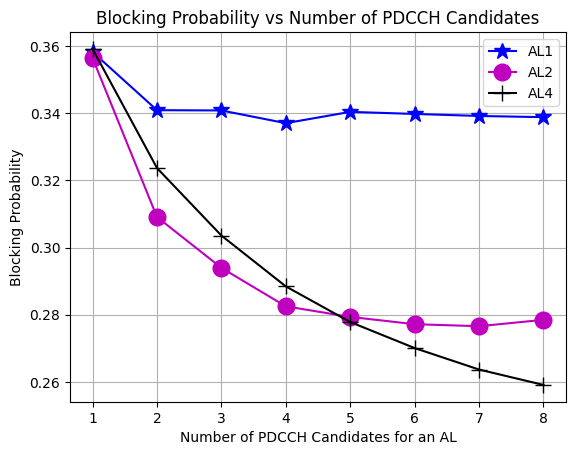

In [8]:
fig, ax = plt.subplots()
ax.plot(supportedNumCand, probOfBlockingForAL1, marker  = "*",linestyle = "solid",ms = 12, c = 'b', label = "AL1")
ax.plot(supportedNumCand, probOfBlockingForAL2, marker  = "o",linestyle = "solid",ms = 12, c = 'm', label = "AL2")
ax.plot(supportedNumCand, probOfBlockingForAL4, marker  = "+",linestyle = "solid",ms = 12, c = 'k', label = "AL4")

ax.legend()
ax.set_xlabel('Number of PDCCH Candidates for an AL')
ax.set_ylabel('Blocking Probability')
ax.set_title('Blocking Probability vs Number of PDCCH Candidates', fontsize=12) 
ax.set_xticks(supportedNumCand)
ax.grid()
plt.show()

## References

[1] `Blocking Probability Analysis for 5G New Radio (NR) Physical Downlink Control Channel`. Mohammad Mozaffari,
      Y.-P. Eric Wang, and Kittipong Kittichokechai